In [1]:
cd /Users/eliasimos/Desktop/beaconcha.in\ data\ -\ fixed\ missing\ slots

/Users/eliasimos/Desktop/beaconcha.in data - fixed missing slots


In [2]:
ls

active_validators_over_time.csv
attestations/
attesterslashings.csv
beaconcha data.xlsx
block deposits.csv
block.csv
block_deposits.csv
blocks_n_vals_aggregate_data.zip
df_proposer_slashings_13k14k.csv
epoch_slot.csv
ffg_requirement_per_epoch_and_slot.csv
missed_per_epoch_sig.csv
missed_per_epoch_sum.csv
missing_slots.csv
orphaned_slot_indices.csv
prop_eff_by_client.csv
prop_eff_by_group.csv
prop_eff_by_group1.csv
prop_effectiveness_no_prop_outlier.csv
prop_slashing_ids_add_slasher.csv
proposer_data_pvt.csv
proposer_data_pvt1.csv
proposer_effectiveness.csv
proposer_effectiveness_master.csv
proposer_v_epoch.csv
proposerslashings.csv
val_balancehistory.csv
val_deposits.csv
val_ids.csv
val_per_epoch_master.csv
val_per_epoch_probs.csv
validator data/
validator.csv
validator_balance_history.csv
validator_performance.csv
validator_performance1.csv
validators.csv
validators1.csv
validators_by_identifier.csv
validators_by_indentifier_master.csv*
voluntaryexits.csv
xlsx/
zero_atts_yet_proposed_

In [3]:
# load useful packages
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
# add seaborn viz
sns.set()

In [4]:
prop_slashings = pd.read_csv('proposerslashings.csv')
prop_slashings.tail()

,id,block_index,block_slot,header1_slot,header2_slot,proposerindex,header1_bodyroot,header1_parentroot,header1_signature,header1_stateroot,header2_bodyroot,header2_parentroot,header2_signature,header2_stateroot
41,42,0,461311,461310,461310,38840,0x48a9e45749423a7a6bed7c034324b3b89f691740731a...,0xab4690135fdd9e4d6c509e7d30a2b6dcf3b11d8cb390...,0xad6453a508df0f0a28cb669fdc359c22380d69d48b06...,0xbb2675e701bb60fd588ec2a0196d511af078f434348f...,0x9b5e01a7fc3803e6f1e7eabe8f8b07e56f955252597c...,0xab4690135fdd9e4d6c509e7d30a2b6dcf3b11d8cb390...,0x94a21ddcb623f1298bdf4b7486fa9af22c99803a5a4b...,0xb6893d1505fd5176d0be8e6dfbed4942496235794329...
42,43,0,461548,461547,461547,38887,0x6b884b5d523ff201546a499eabf5fa68f7705e6d18a6...,0xf97e020d438bbf566a69231543b368aac0910eb2c5be...,0x88989467c72e7bad230ea68a3e9e3831be9f8e7b7246...,0x62534d334d622984af16fca27f64834bcf826cfcec5f...,0xb5ddf18d8d72b8802c6395a860f473ac4cbfd540242f...,0xf97e020d438bbf566a69231543b368aac0910eb2c5be...,0xb8479c4056d40ea3118ea929150fe2a000fd495634fb...,0xdddbf2660df867fc301790d6d04e106057ff343d269a...
43,44,0,462511,462510,462510,38801,0xd929a27ad2034060d00999733a109665dbfa0562d777...,0xbb520b62d49fd5828a9113c27c654a6a3ef42ab0e280...,0x81f03ff3e7d1ec58007a9c65a5221189cc73852ae3f8...,0xcdd11dc474292e276c4a7ca7b4cd88443e390013796a...,0x607bbffc85ae0081beba9521132f2250b37e9c765cf8...,0xbb520b62d49fd5828a9113c27c654a6a3ef42ab0e280...,0xb41a020acb4518f3289c52a9973e9437f22acf90291f...,0x768ef4233efe22d825d81f733937367353dbd15c0228...
44,45,0,462920,462919,462919,38862,0x3a3101a6030a31b9a08daf7c01a4629c7df473c7b563...,0x8bebfb5851bf16d81330e1fb49465405a5940170568e...,0xa262d2085810359dded6e8bdb2c551d227e156b7529f...,0xc161f4365c067adc6fab9097f78fc78d1d1d6ff0c403...,0x772d59a02cfc784e10a9211d52b0941696bdcb9aa246...,0x8bebfb5851bf16d81330e1fb49465405a5940170568e...,0x9487c685eb82d2c9a89caec32b8799ac5779962b4bab...,0xa548f38c9b9ad335cdc1be35f74b5fd9ec14d58ac6b7...
45,46,0,139138,139137,139137,34227,0x00eddb882a4a07b2801499ab203a2daa5b7cae523ac2...,0x20270ff6d743f3dc9a5473d719d7eb8cf2267ddd86c7...,0xa6ac5dedf8ba57f54162f8289ec3214047f112798731...,0x2d50e13a8139a3b765d532fe4436bfa719902445429f...,0xd16e74229757ffb331bd8dc2629ae90b87fffcf07edc...,0x20270ff6d743f3dc9a5473d719d7eb8cf2267ddd86c7...,0x8adb5e2dcd1c0b40d7488f9295445345cf46837261a8...,0xec568685c26385da9a08eba11a5b14da2b796dd056c9...


In [5]:
val_ids = pd.read_csv('val_ids.csv')
val_ids.tail()

,Unnamed: 0,identifier,validatorindex,client_identifier
69036,69036,Rocketpool/Wouimbly/Paolo,78842,unknown
69037,69037,Rocketpool/Wouimbly/Paolo,78843,unknown
69038,69038,Rocketpool/Wouimbly/Paolo,78844,unknown
69039,69039,Rocketpool/Wouimbly/Paolo,78845,unknown
69040,69040,Rocketpool/Wouimbly/Paolo,78846,unknown


In [6]:
prop_slashing_ids = pd.merge(left=prop_slashings, right=val_ids, how='left', left_on='proposerindex', right_on='validatorindex')
prop_slashing_ids.head()

,id,block_index,block_slot,header1_slot,header2_slot,proposerindex,header1_bodyroot,header1_parentroot,header1_signature,header1_stateroot,header2_bodyroot,header2_parentroot,header2_signature,header2_stateroot,Unnamed: 0,identifier,validatorindex,client_identifier
0,1,0,139,138,138,2329,0xa9905d68bfe2f4bde96020c4a5b66b62ef575b8c5096...,0x9ad72edd1303a10d292bf8ad84360d30b309a85fd0ee...,0xa5e55750045079ee500ce6176c3ea83ae1ceb415357e...,0x1b067135c44e9b472608a58499f7e13561dbc0f4fd9a...,0xb416fb23f89604c7191b1502f6b6f20776e2f42093b4...,0x9ad72edd1303a10d292bf8ad84360d30b309a85fd0ee...,0xa87f4a50ed559d883b163d2b2a12db4467b7331cdd2e...,0x0ea91fc990d9a0c2b5195c6e32d734d267f6c768c026...,24531.0,B - 0x00241,2329.0,unknown
1,2,0,16991,16990,16990,21769,0x0505f184a5d08f7b665a9a06391256126319d76d7b4b...,0x56294094cf010fa903961f9883dbd5039c032ea6ced5...,0x81f324df1719728c92e2711fe13092ee8eed64ca8281...,0xde5c6ce9b304fa5de727bce1f0a071e2f0e1039e9e1d...,0x1336c61de419cbcd5e2585896aea272b59e0f4726a15...,0x56294094cf010fa903961f9883dbd5039c032ea6ced5...,0xae7c9e1133c3812e7f67319d52ff40794aa926c86559...,0xb4af1230f131456e9b565c4c4d858f31b0dc80a394e8...,NaN,NaN,NaN,NaN
2,3,0,29377,29376,29376,21770,0x97f64003e547f646f9d2540692f710c98624bbf8a454...,0x58edc74fa162eb5e84459baa6dc05f6b5763b570d894...,0x819bbb4b186bf9ce8fd9f0244c464c7ab43a198b2f71...,0x7528ba45a0c22cc290d4198e7263d966d566a87d3f50...,0x03577e287731d5923961899d8b9640a28e9783fcffed...,0x58edc74fa162eb5e84459baa6dc05f6b5763b570d894...,0xad809604abba824def2cdec11116e00b42d2a21aed9b...,0x1923054793fedb3bb8f81eef6973c0f82c201e4ed783...,NaN,NaN,NaN,NaN
3,4,0,29381,29376,29376,21770,0x97f64003e547f646f9d2540692f710c98624bbf8a454...,0x58edc74fa162eb5e84459baa6dc05f6b5763b570d894...,0x819bbb4b186bf9ce8fd9f0244c464c7ab43a198b2f71...,0x7528ba45a0c22cc290d4198e7263d966d566a87d3f50...,0x03577e287731d5923961899d8b9640a28e9783fcffed...,0x58edc74fa162eb5e84459baa6dc05f6b5763b570d894...,0xad809604abba824def2cdec11116e00b42d2a21aed9b...,0x1923054793fedb3bb8f81eef6973c0f82c201e4ed783...,NaN,NaN,NaN,NaN
4,5,0,31134,31133,31133,21768,0x45c062e2101f053c76821aab07578177556857681479...,0x8b62b47b99f0bb9612508d671f2ccc818b4cfb608aac...,0xaa48ef7e6d22a8fc581c065860cb7f65742b57f0eadd...,0xb0f294fe440ee96ce9a711b0beff465ad6dc084adb80...,0xb1f28850761726a1479512b3eff939900e54c926572e...,0x8b62b47b99f0bb9612508d671f2ccc818b4cfb608aac...,0x8e11983a6dd72765a70badd08cdaafae69ec50f0ada8...,0xe16a611f813eaa0d9ffeb5f9b49c255264b30f897a70...,NaN,NaN,NaN,NaN


In [7]:
block_data = pd.read_csv('block.csv')
block_data = block_data[['slot', 'proposer']]
block_data

,slot,proposer
0,2456,6969
1,2457,12992
2,2458,19170
3,2459,6291
4,2460,15068
...,...,...
466451,150192,18155
466452,150193,15201
466453,150194,27799
466454,150195,32190


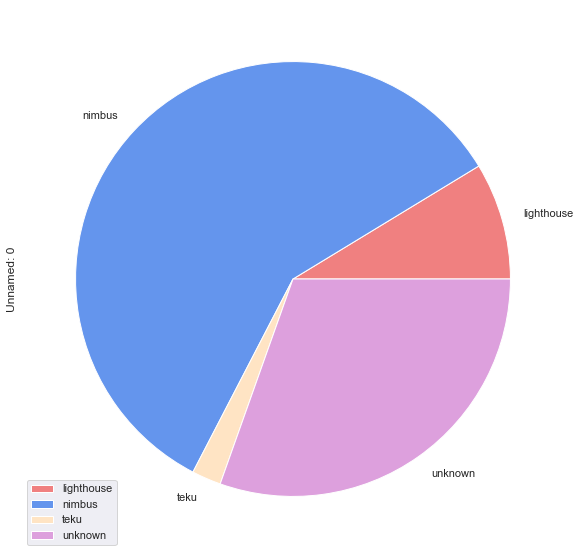

In [8]:
colorscheme = ['lightcoral', 'cornflowerblue','bisque', 'plum', 'palegreen','darkgray']
#prop_slashing_ids_add_slasher = pd.merge(left=prop_slashing_ids, right=block_data, how='left', left_on='block_slot', right_on='slot')
#prop_slashing_ids_add_slasher = prop_slashing_ids_add_slasher['client_identifier'].fillna('unknown')
#prop_slashing_ids_add_slasher.to_csv('prop_slashing_ids_add_slasher.csv')
bb = pd.read_csv('prop_slashing_ids_add_slasher.csv')
bbb = pd.pivot_table(bb, index=["client_identifier"], values=["Unnamed: 0"], aggfunc='count')
bbb.index.name = None
#create new column with index
#voluntary_exits_cum['epoch'] = voluntary_exits_cum.index
bbb.plot.pie(y='Unnamed: 0', colors = colorscheme, figsize=(10, 10))

In [9]:
prop_slashing_ids_add_slasher_client = pd.merge(left=prop_slashing_ids_add_slasher, right=val_ids, how='left', left_on='proposer', right_on='validatorindex')

NameError: name 'prop_slashing_ids_add_slasher' is not defined

In [10]:
attester_slash = pd.read_csv('attesterslashings.csv')

In [12]:
attester_slash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5134 entries, 0 to 5133
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            5134 non-null   int64 
 1   block_slot                    5134 non-null   int64 
 2   block_index                   5134 non-null   int64 
 3   attestation1_index            5134 non-null   int64 
 4   attestation1_indices          5134 non-null   object
 5   attestation1_slot             5134 non-null   int64 
 6   attestation1_source_epoch     5134 non-null   int64 
 7   attestation1_target_epoch     5134 non-null   int64 
 8   attestation2_index            5134 non-null   int64 
 9   attestation2_indices          5134 non-null   object
 10  attestation2_slot             5134 non-null   int64 
 11  attestation2_source_epoch     5134 non-null   int64 
 12  attestation2_target_epoch     5134 non-null   int64 
 13  attestation1_beaco

In [37]:
attester_slash_skim = attester_slash[['block_slot', 'block_index', 'attestation1_slot', 'attestation2_slot', 'attestation1_index', 'attestation2_index', 'attestation1_source_epoch','attestation2_source_epoch', 'attestation1_target_epoch', 'attestation2_target_epoch']]
attester_slash_skim

,block_slot,block_index,attestation1_slot,attestation2_slot,attestation1_index,attestation2_index,attestation1_source_epoch,attestation2_source_epoch,attestation1_target_epoch,attestation2_target_epoch
0,688,0,654,654,0,0,19,19,20,20
1,1254,0,1201,1201,0,0,36,36,37,37
2,15292,0,15100,15100,3,3,470,470,471,471
3,62390,0,62388,62388,4,4,1948,1948,1949,1949
4,73559,1,74739,74739,1,1,2290,2290,2335,2335
...,...,...,...,...,...,...,...,...,...,...
5129,122872,0,74727,74741,3,0,2290,2290,2335,2335
5130,128058,1,74722,74750,5,1,2290,2290,2335,2335
5131,128058,0,74727,74746,3,3,2290,2290,2335,2335
5132,133013,1,74720,74742,6,6,2290,2290,2335,2335


In [16]:
attester_slash_sv = attester_slash.loc[attester_slash['attestation1_source_epoch'] < attester_slash['attestation2_source_epoch']]
a = attester_slash_sv.loc[attester_slash['attestation2_target_epoch'] < attester_slash['attestation1_target_epoch']]
a

,id,block_slot,block_index,attestation1_index,attestation1_indices,attestation1_slot,attestation1_source_epoch,attestation1_target_epoch,attestation2_index,attestation2_indices,...,attestation2_source_epoch,attestation2_target_epoch,attestation1_beaconblockroot,attestation1_signature,attestation1_source_root,attestation1_target_root,attestation2_beaconblockroot,attestation2_signature,attestation2_source_root,attestation2_target_root


In [53]:
attester_slash_dv = attester_slash_skim.loc[attester_slash_skim['attestation1_source_epoch'] > attester_slash_skim['attestation2_source_epoch']]
b = attester_slash_dv.loc[attester_slash_skim['attestation1_target_epoch'] == attester_slash_skim['attestation2_target_epoch']]
bc = b.loc[b['attestation1_slot'] > b['attestation2_slot']]
bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 4912 to 4949
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   block_slot                 6 non-null      int64
 1   block_index                6 non-null      int64
 2   attestation1_slot          6 non-null      int64
 3   attestation2_slot          6 non-null      int64
 4   attestation1_index         6 non-null      int64
 5   attestation2_index         6 non-null      int64
 6   attestation1_source_epoch  6 non-null      int64
 7   attestation2_source_epoch  6 non-null      int64
 8   attestation1_target_epoch  6 non-null      int64
 9   attestation2_target_epoch  6 non-null      int64
dtypes: int64(10)
memory usage: 528.0 bytes
